Install dependencies.

In [1]:
!pip install -qU pip pinecone-client

Set up Pinecone.

In [2]:
import pinecone
import os

api_key = os.getenv('PINECONE_API_KEY') or 'USE_YOUR_API_KEY'
pinecone.init(api_key=api_key)

Check Pinecone version compatibilities.

In [3]:
import pinecone.info

notebook_version = '0.8'
version_info = pinecone.info.version()

assert version_info.server.startswith(notebook_version), (
    'This notebook may not be compatible with the latest Pinecone server. '
    'Consider using the latest notebook.')

assert set(version_info.server.split('.')[:2]) == set(version_info.client.split('.')[:2]), (
    'The installed pinecone-client may not be compatible with the latest Pinecone server. '
    'Consider upgrading to the latest pinecone-client.')

# Hello, Pinecone!

In [4]:
import pinecone.graph
import pinecone.service
import pinecone.connector

In [5]:
service_name="hello-pinecone"

In [6]:
graph = pinecone.graph.IndexGraph()  # Create a Pinecone graph

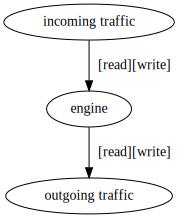

In [7]:
graph.view()  # view the graph

In [8]:
pinecone.service.deploy(service_name, graph)  # deploy the graph as a service

{'success': True, 'msg': ''}

In [9]:
conn = pinecone.connector.connect(service_name)  # connect to the service

In [10]:
conn.upsert(items=[("A", [1, 1, 1]), ("B", [1, 1, 1])]).collect()  # insert vectors

[IndexResult(id='A'), IndexResult(id='B')]

In [11]:
conn.info()  # index info

InfoResult(index_size=2)

In [12]:
pinecone.service.stop(service_name=service_name)  # stop the service

{'success': True}